In [4]:
import numpy as np
import pandas as pd
from os import chdir, listdir
from os.path import isfile, splitext, join
import umap
from matplotlib import pyplot as plt
from sklearn.manifold import TSNE
from sklearn.cluster import DBSCAN
from collections import Counter
import random 
import seaborn as sns
import matplotlib.patches as mpatches

#wd="/mnt/storage5/anton/Amplicon/Leen/temp/"
wd="/mnt/storage5/anton/Amplicon/Holly/temp/"

In [8]:

MSAmatrices = [f for f in listdir(wd) if isfile(join(wd, f)) and splitext(f)[1]==".pkl"]

matrixData={}
for matrix in MSAmatrices:
    matrixData[matrix.replace("mafft","").replace(".pkl","")]=pd.read_pickle(wd+matrix)
i=0

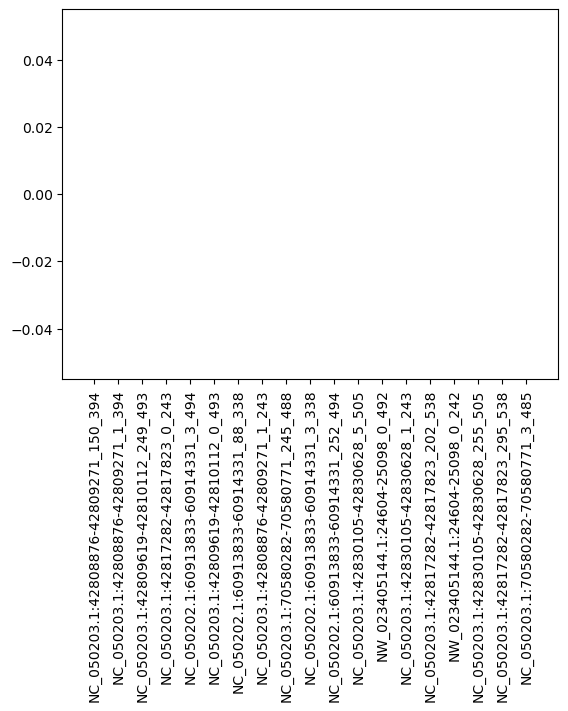

In [9]:
#show regional read densities
readDepths=[]
regions=[]
for region in matrixData.keys():
    readDepths.append(matrixData[region].shape[0])
    regions.append(region)
plt.bar(x=range(0,len(readDepths)), height=readDepths, tick_label=regions)
plt.xticks(rotation=90)
plt.show()

Counter({0: 1281, 4: 406, 3: 262, 1: 172, 2: 5})


/mnt/storage5/anton/miniconda3/lib/python3.7/site-packages/pandas/core/generic.py:4150: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


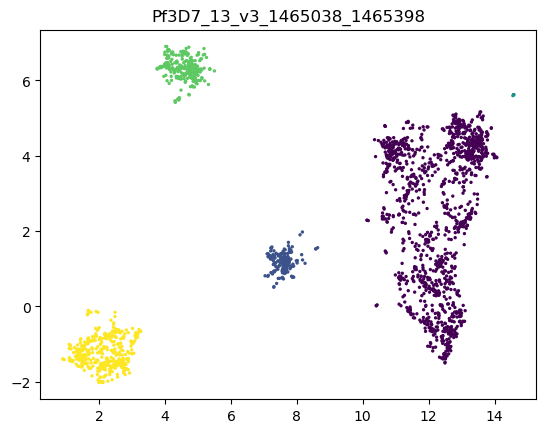

/mnt/storage5/anton/miniconda3/lib/python3.7/site-packages/umap/umap_.py:1762: UserWarning: gradient function is not yet implemented for sokalmichener distance metric; inverse_transform will be unavailable
  "inverse_transform will be unavailable".format(self.metric)


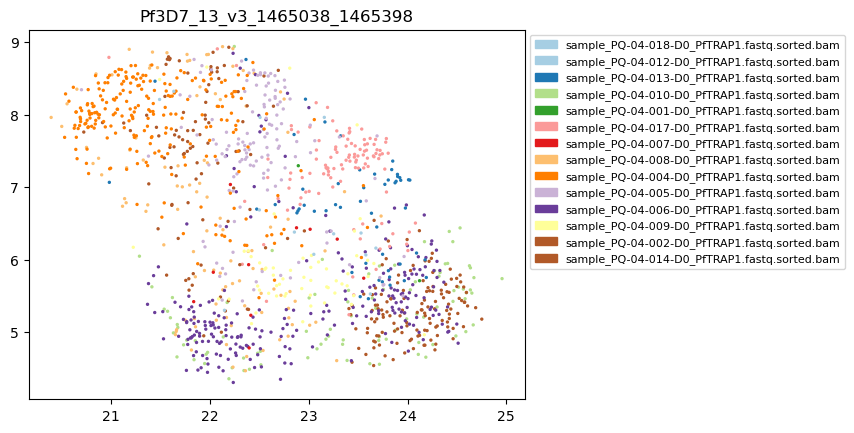

In [58]:
#This will create clustering plot of reads in each region. Each point is a read
minReadDepth=30
for region in ["Pf3D7_13_v3_1465038_1465398"]: #matrixData:
    if matrixData[region].shape[0]<minReadDepth:
        continue
    data=matrixData[region].drop("Sample",axis=1).to_numpy()
    n_neighbors_val=5 #int(data.shape[0]*0.1)
    #all_reads_embedding = umap.UMAP(n_neighbors=n_neighbors_val, min_dist=0.01, metric='hamming').fit_transform(data)
    #clustering = DBSCAN(eps=1, min_samples=5).fit(all_reads_embedding).labels_
    print(Counter(clustering))
    
    groupsDF=pd.DataFrame(clustering, )

    plt.scatter(all_reads_embedding[:,0],all_reads_embedding[:,1], s=2, c=clustering)
    plt.title(region)
    plt.show()

    cluster_subset=np.where(np.asarray(clustering)==0)[0] #set here which cluster you want to try and resolve in greate detail
    samples_subset=[f[0] for f in matrixData[region]["Sample"].iloc[cluster_subset].values]
    reads_subset_embedding = umap.UMAP(n_neighbors=300, min_dist=0.01, metric='sokalmichener').fit_transform(data[cluster_subset,:])
    regionColoursDic={}
    regionsCmap=plt.cm.get_cmap('Paired', len(set(samples_subset)))
    for sample in set(samples_subset):
        regionColoursDic[sample]=regionsCmap( len(regionColoursDic) / len(set(samples_subset)) )
    legendElements=[]
    for key in regionColoursDic:
        legendElements.append(mpatches.Patch(color=regionColoursDic[key], label=key))
    plt.scatter(reads_subset_embedding[:,0],reads_subset_embedding[:,1], s=2, c=[  regionColoursDic[f] for f in samples_subset])
    plt.title(region)        
    plt.legend(bbox_to_anchor=(1,1), handles=legendElements,prop={'size': 8}, loc="upper left")
    plt.show() #this shows them here

In [48]:
groupsDF=pd.DataFrame( {"cluster": clustering+1})# +1 is required because the easiest aggregate function counts non-zero values
groupsDF["Sample"]=matrixData[region]["Sample"]
pd.pivot_table(groupsDF,index="Sample", columns="cluster", aggfunc=np.count_nonzero)

cluster,1,2,3,4,5
Sample,,,,,
sample_PQ-04-001-D0_PfTRAP1.fastq.sorted.bam,4.0,NaN,NaN,6.0,4.0
sample_PQ-04-002-D0_PfTRAP1.fastq.sorted.bam,180.0,6.0,NaN,NaN,NaN
sample_PQ-04-003-D0_PfTRAP1.fastq.sorted.bam,NaN,2.0,2.0,8.0,730.0
sample_PQ-04-004-D0_PfTRAP1.fastq.sorted.bam,472.0,NaN,NaN,NaN,4.0
sample_PQ-04-005-D0_PfTRAP1.fastq.sorted.bam,260.0,4.0,NaN,NaN,NaN
sample_PQ-04-006-D0_PfTRAP1.fastq.sorted.bam,490.0,6.0,NaN,22.0,NaN
sample_PQ-04-007-D0_PfTRAP1.fastq.sorted.bam,20.0,NaN,NaN,426.0,12.0
sample_PQ-04-008-D0_PfTRAP1.fastq.sorted.bam,216.0,NaN,NaN,NaN,NaN
sample_PQ-04-009-D0_PfTRAP1.fastq.sorted.bam,112.0,NaN,NaN,NaN,NaN


In [ ]:
#This will create clustering plot of reads in each region and will colour points by sample the reads are from. Each point is a read
minReadDepth=30
for region in matrixData:
    if matrixData[region].shape[0]<minReadDepth:
        continue
    data=matrixData[region].drop("Sample",axis=1)

    samples=[f[0] for f in matrixData[region]["Sample"].values]
    regionColoursDic={}
    regionsCmap=plt.cm.get_cmap('Paired', len(set(samples)))
    for sample in set(samples):
        regionColoursDic[sample]=regionsCmap( len(regionColoursDic) / len(set(samples)) )

    X_embedded = umap.UMAP(n_neighbors=int(data.shape[0]*0.2), min_dist=0.1, metric='hamming').fit_transform(data)
    clustering = DBSCAN(eps=1, min_samples=5).fit(X_embedded).labels_
    print(Counter(clustering))
    
    plt.scatter(X_embedded[:,0],X_embedded[:,1], s=2, c=[  regionColoursDic[f] for f in samples])
    plt.title(region)
    legendElements=[]
    for key in regionColoursDic:
        legendElements.append(mpatches.Patch(color=regionColoursDic[key], label=key))
    plt.legend(bbox_to_anchor=(1,1), handles=legendElements,prop={'size': 8}, loc="upper left")
    plt.savefig(wd+"/../clusteringPlots/"+region+".jpg",bbox_inches='tight')
    #plt.close() this saves the plots
    plt.show() #this shows them here
